In [13]:
PATH_TRAIN = 'C:\\Users\\HP\\Documents\\biology\\chest_xray\\train'
PATH_TEST = 'C:\\Users\\HP\\Documents\\biology\\chest_xray\\test'
CLASSES = ['NORMAL', 'PNEUMONIA']

https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/

In [21]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import cv2
import os
import tqdm

In [22]:
def image_to_feature_vector(image, size=(128, 128)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [23]:
from skimage import io as skio
import matplotlib.pyplot as plt

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\skimage\io\_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


(439, 712)

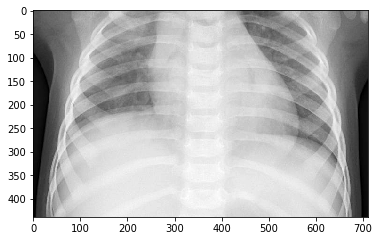

In [24]:
image = skio.imread('C:\\Users\\HP\\Documents\\biology\\chest_xray\\train\\PNEUMONIA\\person1_bacteria_1.jpeg', as_grey=True)
plt.imshow(image, cmap=plt.cm.gray)
image.shape

(439, 712)

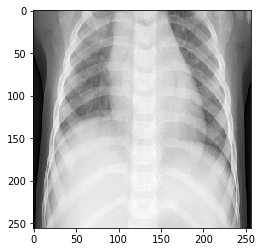

In [25]:
plt.imshow(cv2.resize(image, (256, 256)), cmap=plt.cm.gray)
image.shape

In [26]:
def main_function(imagePaths):
    # initialize the features matrix,
    # and labels list
    features = []
    labels = []
    for img_class in CLASSES:
        class_path = os.path.join(imagePaths, img_class)
        print(img_class)
        # loop over the input images
        l = list(paths.list_images(class_path))
        for imagePath in tqdm.tqdm(l):
            # load the image and extract the class label (assuming that our
            image = cv2.imread(imagePath)    
            feature_vector = image_to_feature_vector(image)
            features.append(feature_vector)
            labels.append(img_class)
    return features, labels

In [27]:
# list(paths.list_images(PATH_TRAIN))
trainF, trainL = main_function(PATH_TRAIN)

NORMAL


100%|██████████████████████████████████████████████████████████████████████████████| 1341/1341 [01:51<00:00, 12.03it/s]


PNEUMONIA


100%|██████████████████████████████████████████████████████████████████████████████| 3875/3875 [01:29<00:00, 43.40it/s]


In [28]:
testF, testL = main_function(PATH_TEST)

NORMAL


100%|████████████████████████████████████████████████████████████████████████████████| 234/234 [00:12<00:00, 19.14it/s]


PNEUMONIA


100%|████████████████████████████████████████████████████████████████████████████████| 390/390 [00:07<00:00, 49.86it/s]


In [29]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model.fit(trainF, trainL)
acc = model.score(testF, testL)
print("Accuracy: {:.2f}% k = 5".format(acc * 100))

Accuracy: 73.88% k = 5


In [108]:
model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
model.fit(trainF, trainL)
acc = model.score(testF, testL)
print("Accuracy: {:.2f}% k = 1".format(acc * 100))

Accuracy: 75.48% k = 1
